In [16]:
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
from allensdk.api.queries.ontologies_api import OntologiesApi
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

mcc = MouseConnectivityCache(manifest_file='connectivity/mouse_connectivity_manifest.json')
all_experiments = mcc.get_experiments(dataframe=True)

In [89]:
ontology = mcc.get_ontology()

isocortex = ontology['Isocortex']
vis = ontology['VIS']

visl5_cre_experiments = mcc.get_experiments(cre=['Rbp4-Cre_KL100','Scnn1a-Tg3-Cre','Rorb-IRES2-Cre','Tlx3-Cre_PL56',
                                                 'Glt25d2-Cre_NF107','Efr3a-Cre_No108'], 
                                                injection_structure_ids=vis['id'])

print "%d VIS Cre+ L5 experiments" % len(visl5_cre_experiments)

46 VIS Cre+ L5 experiments


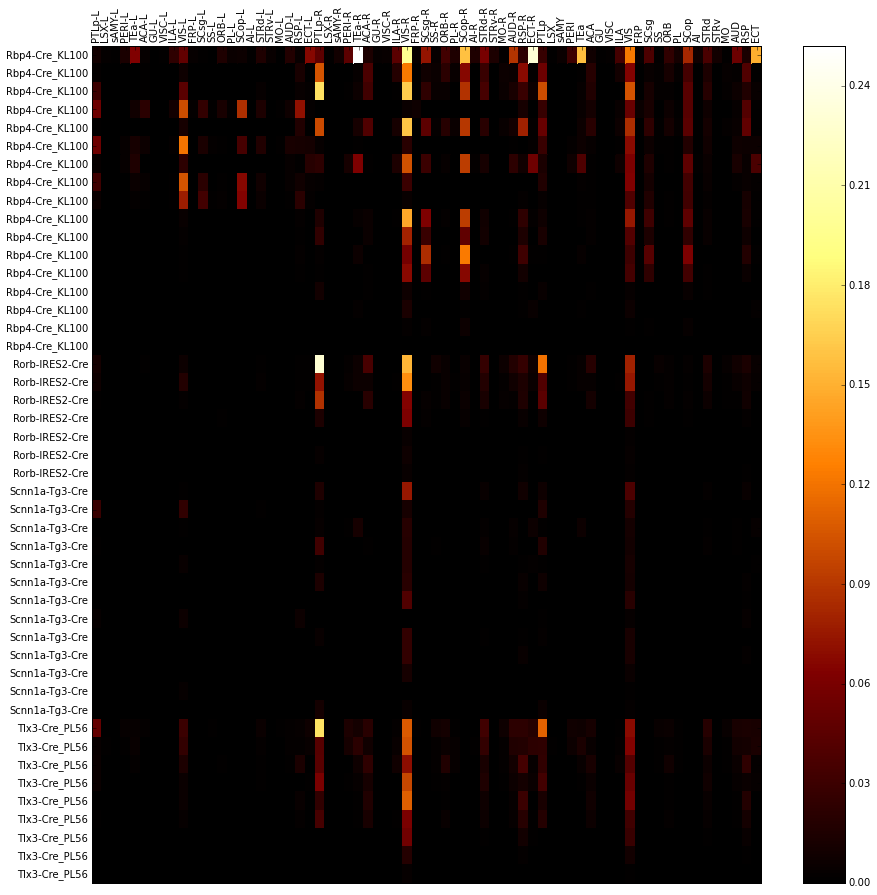

In [104]:
visl5_sorted = sorted(visl5_cre_experiments, key=lambda k: k['transgenic-line'])
vis_experiment_ids = [ e['id'] for e in visl5_sorted ]
ctx_children = ontology.get_child_ids([ontology['STR'].id,ontology['SCs'].id,ontology['Isocortex'].id])

pm = mcc.get_projection_matrix(experiment_ids = vis_experiment_ids, 
                               projection_structure_ids = ctx_children,
                               #hemisphere_ids= [], # right hemisphere, ipsilateral
                               parameter = 'projection_density')

row_labels = [f['transgenic-line'] for f in visl5_sorted]
#row_labels = pm['rows'] # these are just experiment ids
column_labels = [ c['label'] for c in pm['columns'] ] 
matrix = pm['matrix']

fig, ax = plt.subplots(figsize=(15,15))
heatmap = ax.pcolor(matrix, cmap=plt.cm.afmhot)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(matrix.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(matrix.shape[0])+0.5, minor=False)

ax.set_xlim([0, matrix.shape[1]])
ax.set_ylim([0, matrix.shape[0]])          

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(column_labels, minor=False,rotation = 90)
ax.set_yticklabels(row_labels, minor=False)

plt.colorbar(heatmap)
plt.show()
